<div >
    <img src = "../banner/banner_ML_UNLP_1900_200.png" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/ML_UNLP_Lectures/blob/main/Week04/Notebook_Tree_Methods.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Tree-Based Methods

## Motivación: Prediciendo Precios de propiedades


$$
Precio=f(X)
$$



## CARTs

Cargamos los paquetes

In [ ]:
# install.packages("pacman") #run this line if you use Google Colab

In [1]:
#packages
require("pacman")
p_load("tidyverse","rpart","ggplot2")

Loading required package: pacman



### Ames Data Set

Este conjunto de datos contiene información detallada sobre las características de viviendas en Ames, Iowa, y su precio de venta. Incluye más de 80 variables que describen aspectos físicos, de ubicación y de calidad de las propiedades, como el tamaño habitable, el tipo de edificio, el año de construcción, el número de baños, y si tiene garaje o cercado, entre otros.

Es ampliamente utilizado en ciencia de datos y machine learning como un caso realista para problemas de regresión.  
La descripción completa de las variables puede consultarse aquí:  
https://jse.amstat.org/v19n3/decock/DataDocumentation.txt



In [2]:
p_load("modeldata")

data("ames", package = "modeldata")

In [3]:
dim(ames)

[1] 2930   74

In [4]:
head(ames)

MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,⋯,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,5,2010,WD,Normal,215000,-93.61975,42.05403
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.61976,42.05301
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.61939,42.05266
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,4,2010,WD,Normal,244000,-93.61732,42.05125
Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.63893,42.06090
Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,No_Fence,None,0,6,2010,WD,Normal,195500,-93.63893,42.06078


In [41]:
amestree <- rpart(Sale_Price ~  Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,data=ames, control = list(maxdepth =2 ))


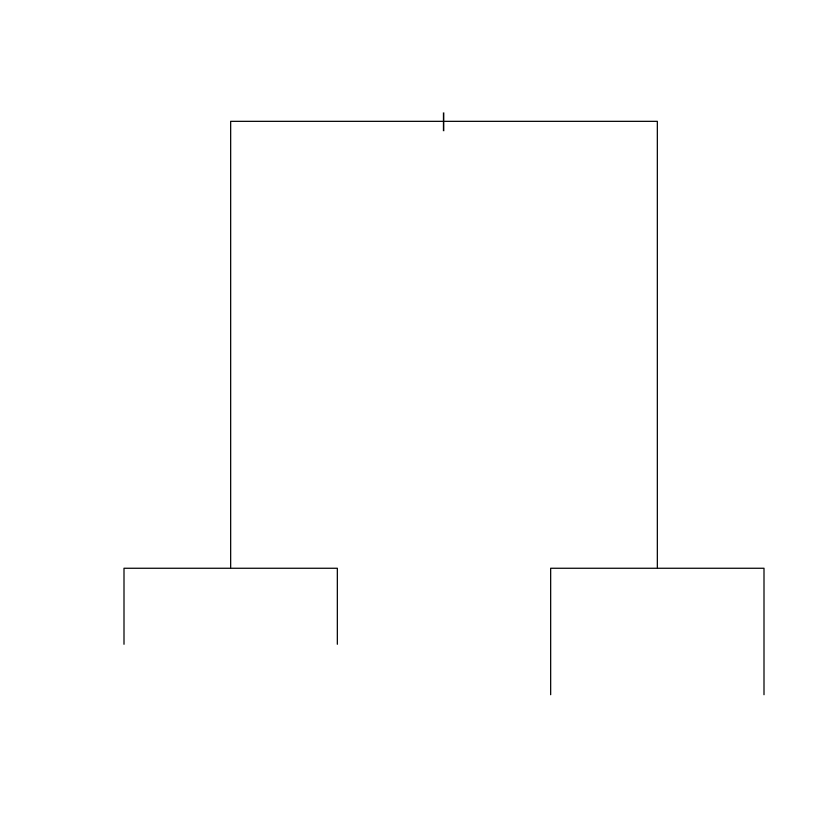

In [42]:
plot(amestree)

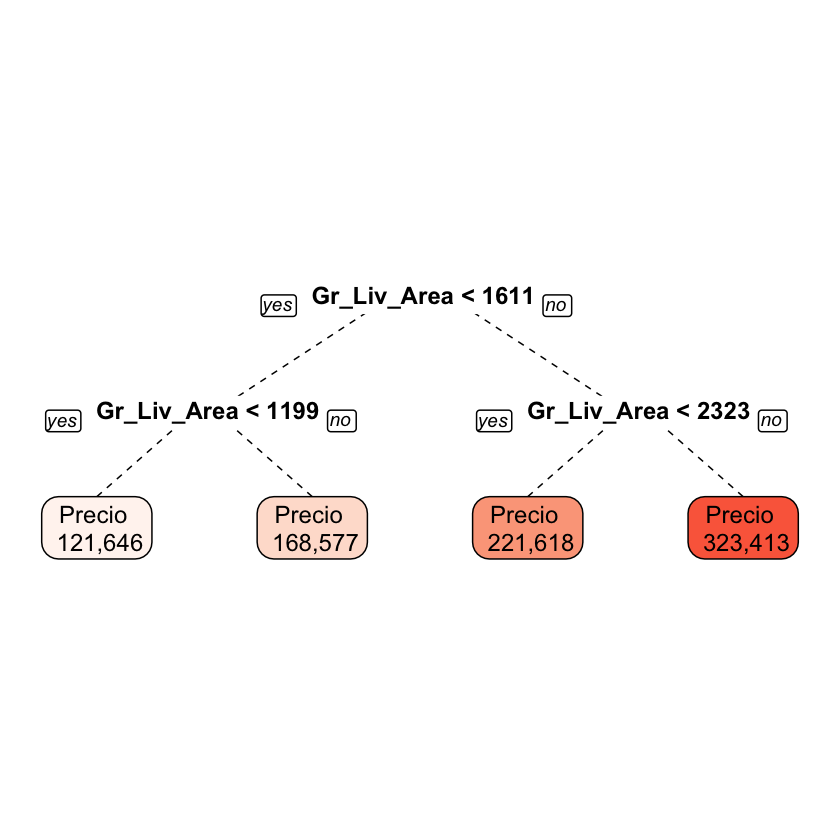

In [43]:
p_load("rpart.plot")
prp(amestree, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Reds",compress=FALSE,ycompress = FALSE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(amestree$frame$yval, 0), nsmall=0, big.mark=",")))

### Sobreajuste

<div >
<img src = "figures/tree_uba.png" width="300"/>
</div>


- Fijar la profundidad del árbol. (implementado en Caret `method=rpart2`)

- Fijar la mínima cantidad de datos que están contenidos dentro de cada hoja. 

- Cost complexity pruning (implementado en Caret con `method=rpart`)

- `tidymodels` implementa todos

##### Implementación con Caret

In [22]:
p_load("caret")

In [24]:
fitControl<-trainControl(method ="cv",
                         number=5)

#####  `method=rpart2`  allows to tune Max Tree Depth

In [25]:
set.seed(123)
tree_rpart2 <- train(
    log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,
    data=ames,
    method = "rpart2",
    trControl = fitControl,
    tuneGrid = expand.grid(maxdepth = seq(1,8,1))
)

In [26]:
tree_rpart2

CART 

2930 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2344, 2345, 2344, 2343, 2344 
Resampling results across tuning parameters:

  maxdepth  RMSE       Rsquared   MAE      
  1         0.3307490  0.3412068  0.2506236
  2         0.3129377  0.4108913  0.2357003
  3         0.3012935  0.4554833  0.2280263
  4         0.2969431  0.4715011  0.2243649
  5         0.2940238  0.4816534  0.2225891
  6         0.2893923  0.4977432  0.2187853
  7         0.2848199  0.5137234  0.2150838
  8         0.2836619  0.5176284  0.2141427

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was maxdepth = 8.

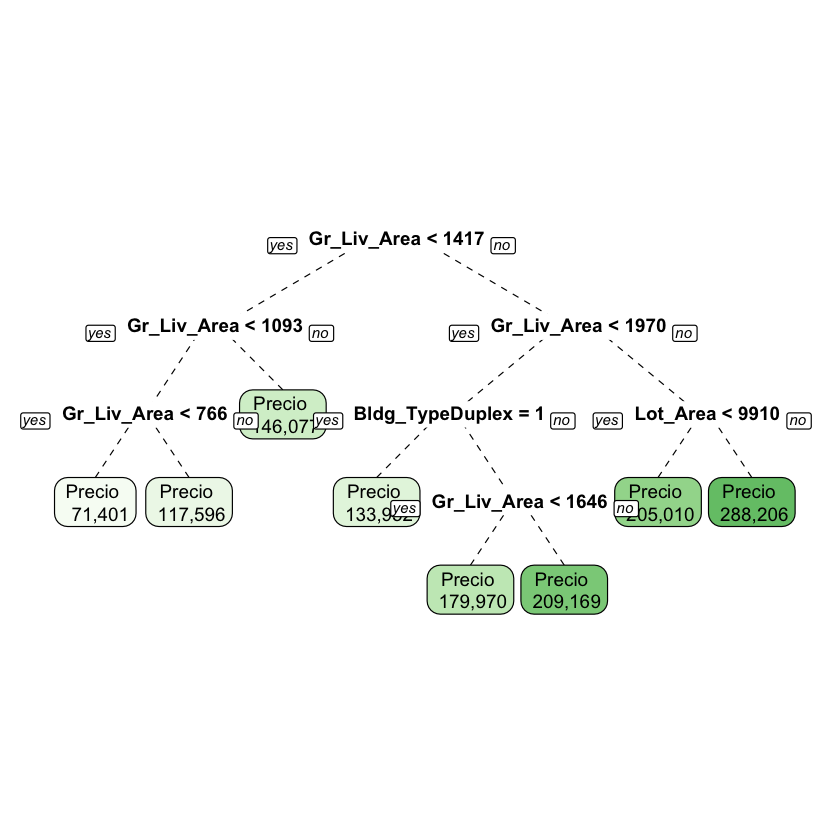

In [27]:
prp(tree_rpart2$finalModel, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=FALSE,ycompress = FALSE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(exp(tree_rpart2$finalModel$frame$yval), 0), nsmall=0, big.mark=",")))

#### Cost complexity Prunning


Cost complexity del árbol  $T$ con $[T]$ nodos terminales del árbol 
\begin{align}
  C_{\alpha}(T)= \sum_{m=1}^{[T]}  \sum_{x_i\in R_m} (y_i-\hat{y}_m)^2 + \alpha [T]
\end{align}


Objetivo: para un dado $\alpha$, encontrar el pruning óptimo que minimice  $C_{\alpha}(T)$

Se logra eliminando sucesivamente las ramas que producen un aumento mínimo en $\sum_{x_i\in R_m} (y_i-\hat{y}_m)^2 $


##### Algoritmo completo

  - Hacemos crecer el árbol

  - Para un dado $\alpha$, aplicamos  *cost complexity pruning* 
    
  - Utilizamos K-fold cross-validation para elegir $\alpha$. 

  
Tenemos entonces una secuencia de subarboles para distintos valores de $\alpha$ 

Elegimos el $\alpha$ y el subárbol que tienen el menor error de predicción.

#####  `method=rpart`  only allows to tune Complexity Parameter

- Can change the length


In [35]:
set.seed(123)
tree_lenght <- train(
    log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,
    data=ames[1:2060,],
    method = "rpart",
    trControl = fitControl,
    tuneLength=20
)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [36]:
tree_lenght

CART 

2060 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1648, 1649, 1648, 1648, 1647 
Resampling results across tuning parameters:

  cp           RMSE       Rsquared   MAE      
  0.003205825  0.2739691  0.5566951  0.2008792
  0.003486224  0.2737976  0.5571540  0.2009409
  0.003524742  0.2737976  0.5571540  0.2009409
  0.003553970  0.2739270  0.5567641  0.2011439
  0.003614957  0.2747349  0.5541277  0.2016907
  0.004563707  0.2765443  0.5479129  0.2043424
  0.004973592  0.2765309  0.5478891  0.2046448
  0.005191609  0.2780958  0.5427069  0.2067702
  0.006039824  0.2805494  0.5347763  0.2091112
  0.006765082  0.2822115  0.5292951  0.2112537
  0.007435379  0.2834765  0.5248797  0.2122554
  0.008016996  0.2848663  0.5201246  0.2137622
  0.010257228  0.2876685  0.5097591  0.2165519
  0.012207507  0.2896240  0.5030708  0.2180731
  0.016335661  0.2924728  0.4927856  0.2204853
  0.018427716  0.2929141  0.4912344  0.2210217
  0.0282

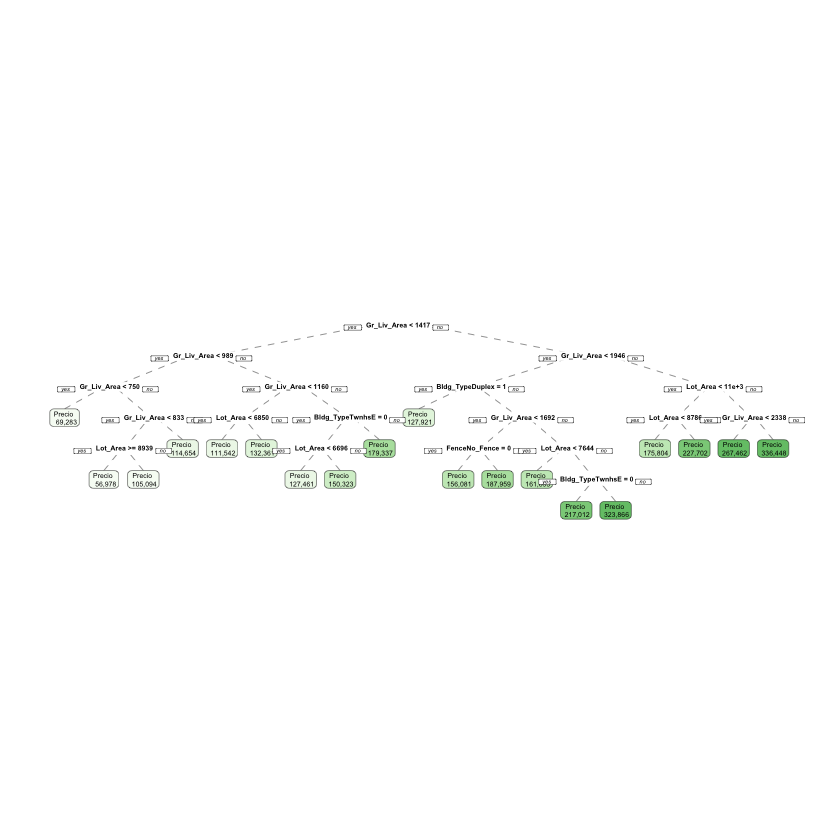

In [37]:
prp(tree_lenght$finalModel, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=FALSE,ycompress = FALSE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round(exp(tree_lenght$finalModel$frame$yval), 0), nsmall=0, big.mark=",")))

- Or the grid

In [33]:
set.seed(123)
tree_grid <- train(
    log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence + Lot_Area,
    data=ames,
    method = "rpart",
    trControl = fitControl,
    tuneGrid = expand.grid(cp = seq(0.0026, 0.0027, length.out = 10))
)


In [34]:
tree_grid

CART 

2930 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2344, 2345, 2344, 2343, 2344 
Resampling results across tuning parameters:

  cp           RMSE       Rsquared   MAE      
  0.002600000  0.2637123  0.5839212  0.1950951
  0.002611111  0.2636801  0.5838739  0.1950754
  0.002622222  0.2636801  0.5838739  0.1950754
  0.002633333  0.2636801  0.5838739  0.1950754
  0.002644444  0.2636801  0.5838739  0.1950754
  0.002655556  0.2638306  0.5833696  0.1951839
  0.002666667  0.2638306  0.5833696  0.1951839
  0.002677778  0.2638306  0.5833696  0.1951839
  0.002688889  0.2638306  0.5833696  0.1951839
  0.002700000  0.2637557  0.5836025  0.1949532

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.002644444.

More details here: https://topepo.github.io/caret/train-models-by-tag.html#tree-based-model

### Comentarios sobre Árboles


#### Pros: 
  
    - Los árboles son muy fáciles de explicar a las personas (probablemente incluso más fáciles que la regresión lineal)

    - Los árboles se pueden trazar gráficamente y son fácilmente interpretados incluso por no expertos. Variables más importantes en la parte superior



#### Cons:
    
    - Si la estructura es lineal, CART no funciona bien
    
<div >
<img src = "figures/tree_vs_reg.png" />
</div>


    - Los árboles no son muy robustos 
    

## Bagging and Random Forests

### Intuición con código


Una forma de mejorar la estabilidad y precisión de los árboles de decisión es a través del bagging (bootstrap aggregating). La idea central es entrenar múltiples árboles sobre distintas muestras del conjunto de datos —obtenidas con reemplazo (bootstrap)— y luego combinar sus predicciones. Esto reduce la varianza del modelo y mejora su capacidad de generalización.

En este ejemplo, generamos una única muestra bootstrap del dataset original y entrenamos un árbol simple sobre esa muestra:

In [38]:
set.seed(101010)
sample_ames2 <- sample_frac(ames, size = 1, replace = TRUE) 

Entrenamos un árbol poco profundo (maxdepth = 2) para facilitar la visualización y destacar cómo el modelo aprende patrones sobre una muestra específica del conjunto. 

In [39]:
amestree2 <- rpart(log(Sale_Price) ~ Gr_Liv_Area + Bldg_Type + Fence + Lot_Area,
                   data = sample_ames2,
                   control = list(maxdepth = 2))

Luego, visualizamos el árbol con `prp()` personalizando las etiquetas de los nodos para mostrar el precio estimado en escala original (deshaciendo el log):

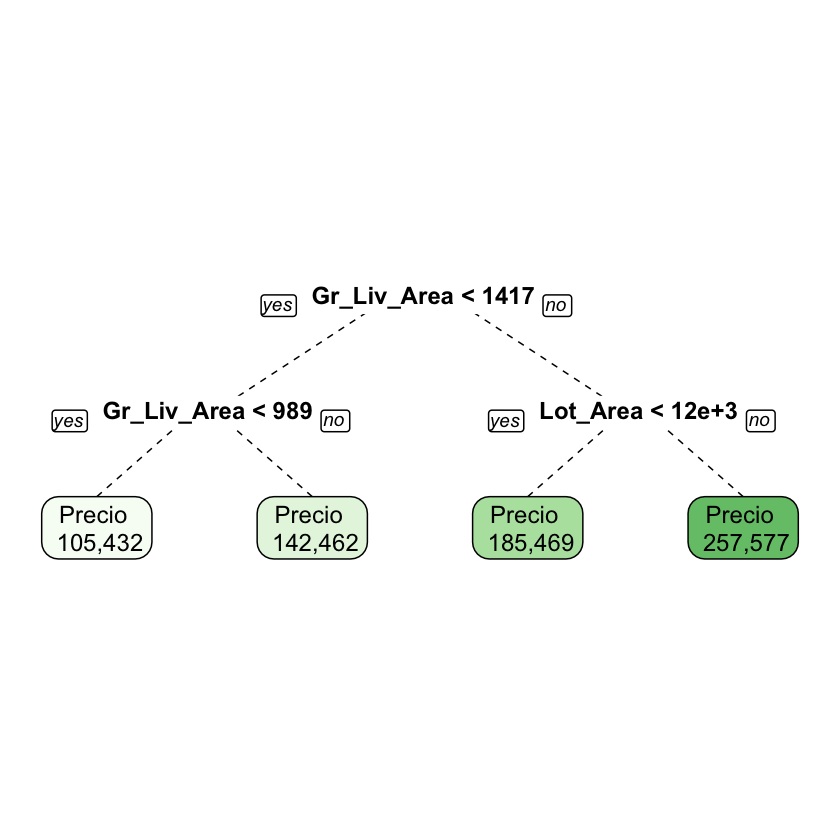

In [40]:
prp(amestree2, 
    under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen = 15, tweak = 1.2,
    clip.facs = TRUE, box.palette = "Greens", compress = FALSE, ycompress = FALSE,
    node.fun = function(x, labs, digits, varlen) 
      paste("Precio \n", format(round(exp(amestree2$frame$yval), 0), nsmall = 0, big.mark = ","))
)


Comparamos el árbol ajustado sobre la muestra bootstrap (`amestree2`) con el árbol original (`amestree`), entrenado sobre el conjunto de datos original. Esta comparación nos permite visualizar cómo el muestreo con reemplazo introduce variabilidad en la estructura del árbol —una idea clave detrás del bagging.

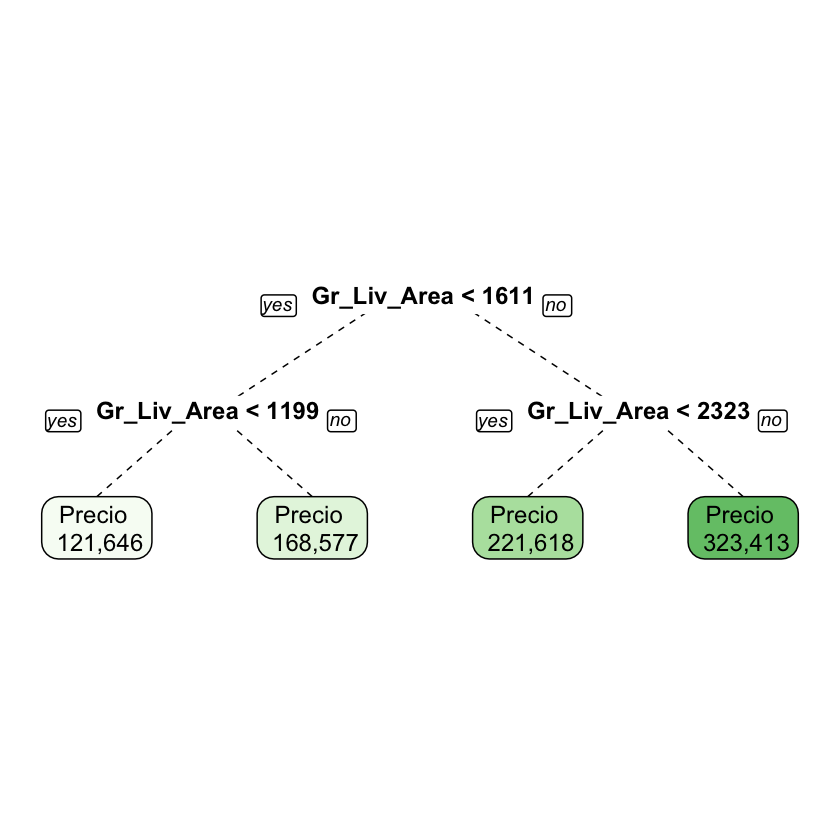

In [45]:
prp(amestree, under = TRUE, branch.lty = 2, yesno = 2, faclen = 0, varlen=15,tweak=1.2,clip.facs= TRUE,box.palette = "Greens",compress=FALSE,ycompress = FALSE,node.fun=function(x, labs, digits, varlen) paste("Precio \n", format(round((amestree$frame$yval), 0), nsmall=0, big.mark=",")))

Como vemos formalmente las predicciones de Bagging?

Formalmente, si denotamos los árboles como funciones:

$$
T_{\text{1}}(x) = \sum_{j=1}^{J_1} \gamma_{j}^{(1)} \cdot \mathbf{1}(x \in R_j^{(1)}), \quad
T_{\text{2}}(x) = \sum_{k=1}^{J_2} \gamma_{k}^{(2)} \cdot \mathbf{1}(x \in R_k^{(2)})
$$

donde cada $ R_j^{(1)} $ y $ R_k^{(2)} $ es una región terminal (una hoja) del árbol correspondiente, y $ \gamma 4 es la predicción constante en esa región.

Entonces, si quisiéramos combinar estos dos árboles, la predicción combinada sería simplemente el promedio:

$
\hat{f}(x) = \frac{1}{2} \left( T_{\text{1}}(x) + T_{\text{2}}(x) \right)
$

En términos prácticos, para cualquier observación \( x \), cada árbol le asigna un valor predicho dependiendo de la región hoja en la que cae, y el modelo final sería el promedio de ambos.


### Con `caret` y `ranger`

Podemos entrenar estos modelos  utilizando el paquete `ranger` en combinación con `caret`, lo cual nos permite buscar automáticamente la mejor combinación de hiperparámetros mediante validación cruzada.


In [46]:
p_load("ranger")
p_load("caret")


`Caret` nos permite ajustar facilmente los siguientes hiperparámetros

- `mtry`: número de predictores seleccionados aleatoriamente en cada división.
- `splitrule`: criterio de división (en regresión, típicamente `"variance"`).
- `min.node.size`: número mínimo de observaciones en un nodo terminal.
- Falta alguno importante?

In [47]:
set.seed(123)  # Fijamos semilla para reproducibilidad

tree_ranger_grid <- train(
    log(Sale_Price) ~ Gr_Liv_Area + Bldg_Type + Fence,  # Fórmula del modelo
    data = ames,  # Dataset de entrenamiento
    method = "ranger",  # Usamos el motor ranger para Random Forests
    trControl = fitControl,  # Especificamos los controles de validación cruzada definidos antes
    tuneGrid = expand.grid(   # Definimos la grilla de hiperparámetros a explorar
        mtry = c(1, 2, 3),  # Número de predictores seleccionados al azar en cada división
        splitrule = "variance",  # Regla de partición basada en la reducción de varianza (regresión)
        min.node.size = c(1, 3, 5)  # Tamaño mínimo de nodos terminales
    ),
    importance = "permutation"  # Calculamos la importancia de variables por permutación
)


In [48]:
tree_ranger_grid

Random Forest 

2930 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2344, 2345, 2344, 2343, 2344 
Resampling results across tuning parameters:

  mtry  min.node.size  RMSE       Rsquared   MAE      
  1     1              0.3468688  0.4652012  0.2565061
  1     3              0.3451265  0.4674624  0.2549682
  1     5              0.3444146  0.4687882  0.2544363
  2     1              0.2952702  0.5536234  0.2152427
  2     3              0.2956889  0.5538360  0.2154844
  2     5              0.2949705  0.5523762  0.2147375
  3     1              0.2671978  0.5928475  0.1949658
  3     3              0.2686117  0.5911269  0.1957694
  3     5              0.2681990  0.5921731  0.1954628

Tuning parameter 'splitrule' was held constant at a value of variance
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 3, splitrule = variance
 and min.node.size = 1.

Una vez entrenado el modelo, podemos examinar qué tan importantes fueron las variables explicativas en las decisiones del Random Forest. Esto nos da una idea de qué características influyen más en la predicción del precio de las viviendas.


NOTA sobre Variable Importance con CV:
El CV solo se usa para encontrar los mejores hiperparámetros. La importancia por permutación se calcula UNA VEZ en el modelo FINAL (re-entrenado con todos los datos), usando predicciones OOB de ranger. NO es un promedio de las importancias de los 5 folds del CV.


In [49]:
varImp(tree_ranger_grid)

ranger variable importance

                        Overall
Gr_Liv_Area            100.0000
Bldg_TypeDuplex          4.7947
Bldg_TypeTwoFmCon        3.2234
FenceNo_Fence            2.8830
Bldg_TypeTwnhsE          2.1580
FenceMinimum_Privacy     2.1104
Bldg_TypeTwnhs           1.2831
FenceGood_Wood           0.3994
FenceMinimum_Wood_Wire   0.0000

## Gradient Boosting Trees

\begin{align}
\hat{f}_{gbm}(x)=\sum_{m=1}^{M}\lambda \hat{f}_{m}(x_{i})
\end{align}

- n.trees (# Boosting Iterations) $M$
- interaction.depth (Max Tree Depth) $J$
- shrinkage (Shrinkage) $\lambda$
- n.minobsinnode (Min. Terminal Node Size) 

In [ ]:
p_load('gbm')


grid_gbm<-expand.grid(n.trees=c(200,300,500),
                      interaction.depth=c(4,6),
                      shrinkage=c(0.001,0.01),
                      n.minobsinnode = c(10,30))


grid_gbm


In [ ]:
fitControl<-trainControl(method ="cv",
                         number=5)

set.seed(123)  # Fijamos semilla para reproducibilidad
gbm_tree <- train( log(Sale_Price) ~ .,
    data=ames,
  method = "gbm", 
  trControl = fitControl,
  tuneGrid=grid_gbm,
  verbose = FALSE
)            


In [ ]:
gbm_tree

In [ ]:
min(gbm_tree$results$RMSE)

## Xgboost


\begin{align}
\mathcal{L} &= \sum_{i=1}^N L(y_i,\hat{y}_i) + \sum_{k=1}^m \Omega(f_k)
\end{align}


In [ ]:
p_load('xgboost')

Hiper parametros en `R`

-  nrounds (# of trees): This parameter is similar to the random forest parameter. It determines the number of trees in the gradient-boosting forest (M). A range I often explore  100 and 1000 trees.

- max_depth (Max Tree Depth): The depth of a tree corresponds to how many branches deep each tree is allowed to go (J). A larger depth corresponds to more flexible trees, which can also lead to overfitting. The default tree depth in xgboost is 6, and it is often useful to explore max_depth range of between 4 and 8.

- eta (Shrinkage): The eta parameter controls how the boosted tree at a given iteration is merged with the tree in the previous iteration ($\eta$ in the algorithm). The default value is 0.3, and evaluating a range of effects between 0.01 and 0.5 is often important.

- min_child_weight (min obs per node) This parameter refers to the minimum allowable number of observations in each node. The default value is 1. However, this number is quite low, and caution is warranted here, particularly when the max_depth is large. I always set this value to at least ten and often explore ranges between 10 and 50.

- gamma (Minimum Loss Reduction) The gamma parameter controls the extent to which changes in the tree structure occur based on changes in the loss function (this is the $\gamma$ in the equation). The default gamma value is 0.  I often explore 0 and 1

- lambda (regularization term on weights) is the $\lambda$ parameter in the above equation. The default is set to 1.

- colsample_bytree (Subsample Ratio of Columns)
 
- subsample (Subsample Percentage)



In [ ]:
grid_xbgoost <- expand.grid(nrounds = c(100,250),
                            max_depth = c(2,4), 
                            eta = c(0.01,0.05), 
                            gamma = c(0,1), 
                            min_child_weight = c(10, 25),
                            colsample_bytree = c(0.33,0.66),
                            subsample = c(0.4,0.8))

grid_xbgoost

In [ ]:
set.seed(1011)
Xgboost_tree <- train(log(Sale_Price) ~ .,
    data=ames,
  method = "xgbTree", 
  trControl = fitControl,
  tuneGrid=grid_xbgoost
)        

Xgboost_tree

In [ ]:
Xgboost_tree$bestTune

In [ ]:
min(Xgboost_tree$results$RMSE)

It’s important to note that there is never a single optimal tuning parameter choice for all (or even most) settings. In fact, the choice of a given tuning parameter often has important effects on the optimal value of other tuning parameters. There are usually important tradeoffs to consider between tuning parameter values. For example, in the context of XGBoost, a high value of `min_child_weight` may require a lower `eta` or `max_depth` value. However, this is true for other types of machine learning algorithms.